## Notebook for comparison between MIOST method and 4DVarnet
#### Joaquin Opazo

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
Season1 = 'January-February'
Season2 = "April-May"
Season3 = 'July-August'
Season4 = "Octobre-Novembre"
Year = "Year"
Seasons = [Season1,Season2,Season3,Season4,Year]

In [3]:
varnet = pd.read_csv('4d.csv').replace('rec_ssh', '4d').sort_values(by='domain')

In [4]:
miost = pd.read_csv('miost.csv').drop(columns=['LON','LAT']).replace('rec_ssh', 'miost').sort_values(by='domain')

In [16]:
merged = pd.merge(varnet, miost, on=['domain','period'])
merged

,variable_x,domain,period,lt_x,lx_x,mu_x,variable_y,lt_y,lx_y,mu_y
0,4d,NATL,April-May,8.539,0.100,0.94237,miost,2.512,0.250,0.95662
1,4d,NATL,July-August,9.946,0.715,0.91005,miost,5.503,0.250,0.95374
2,4d,NATL,Octobre-Novembre,9.227,1.432,0.91717,miost,2.759,0.250,0.95553
3,4d,NATL,Year,300.349,1.397,0.92700,miost,21.459,0.250,0.95552
4,4d,NATL,January-February,9.858,0.712,0.94162,miost,3.532,0.250,0.95625
5,4d,canaries,April-May,17.162,0.101,0.95453,miost,10.980,1.171,0.95768
6,4d,canaries,January-February,20.848,0.937,0.95178,miost,12.833,1.272,0.95691
7,4d,canaries,Year,20.759,0.101,0.94521,miost,25.314,0.252,0.95286
8,4d,canaries,July-August,20.169,1.059,0.91737,miost,19.487,1.303,0.94211
9,4d,canaries,Octobre-Novembre,9.177,1.156,0.93802,miost,6.146,1.222,0.94411


## Data comparison

### - By Season

In [17]:
df_S1 = merged.loc[merged['period'] == Season1]
df_S2 = merged.loc[merged['period'] == Season2]
df_S3 = merged.loc[merged['period'] == Season3]
df_S4 = merged.loc[merged['period'] == Season4]
df_SY = merged.loc[merged['period'] == Year]
dfs = [df_S1,df_S2,df_S3,df_S4,df_SY]

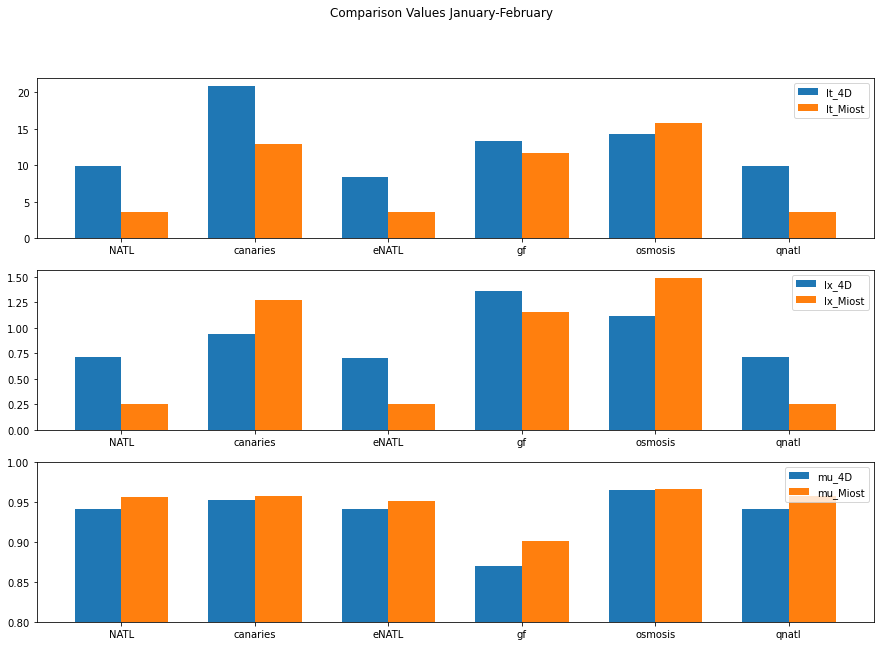

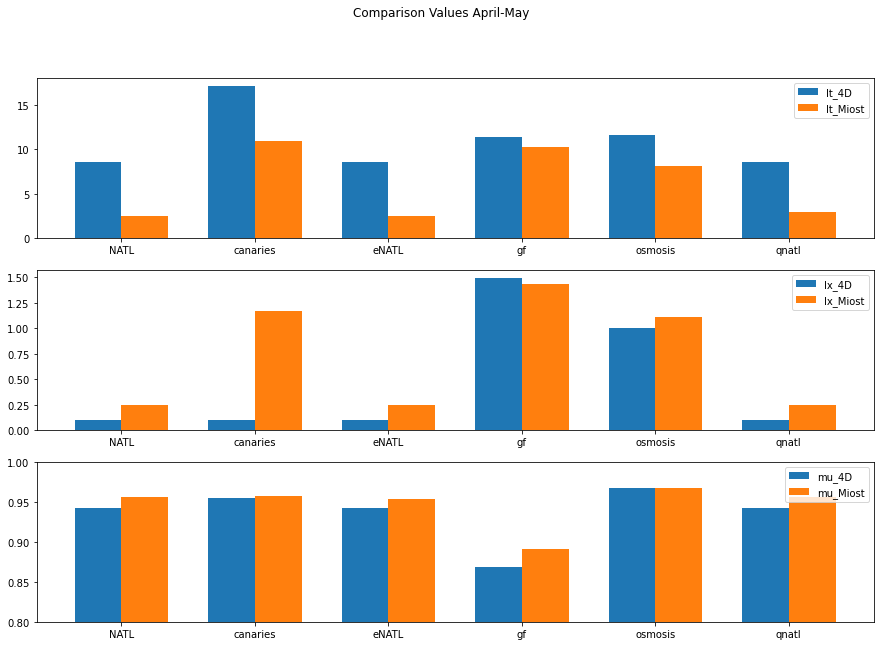

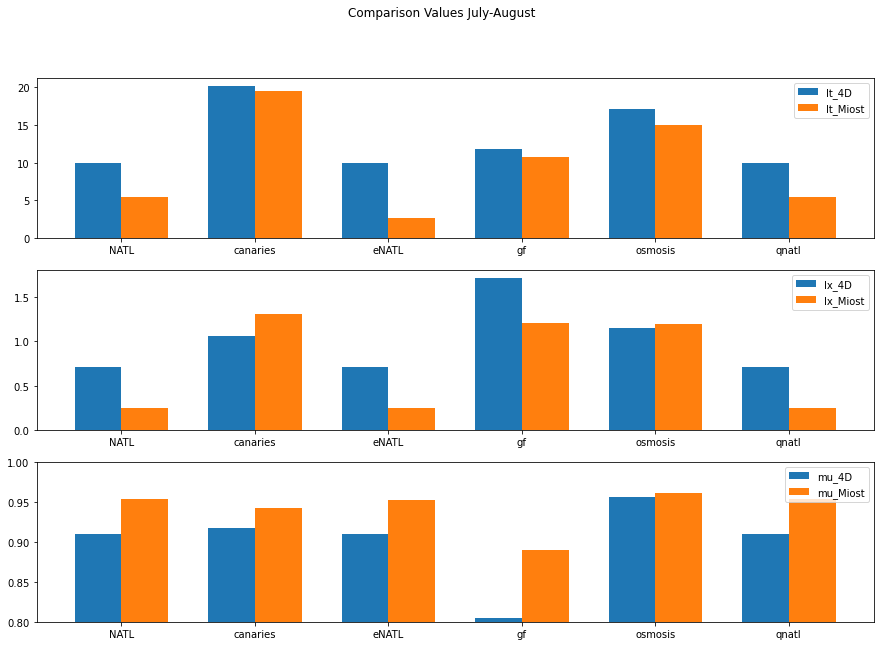

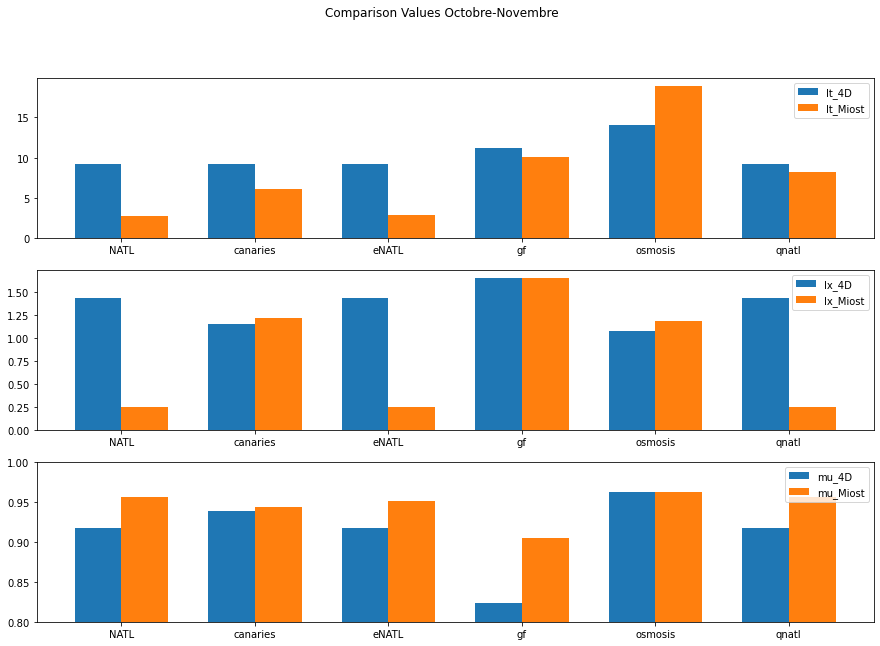

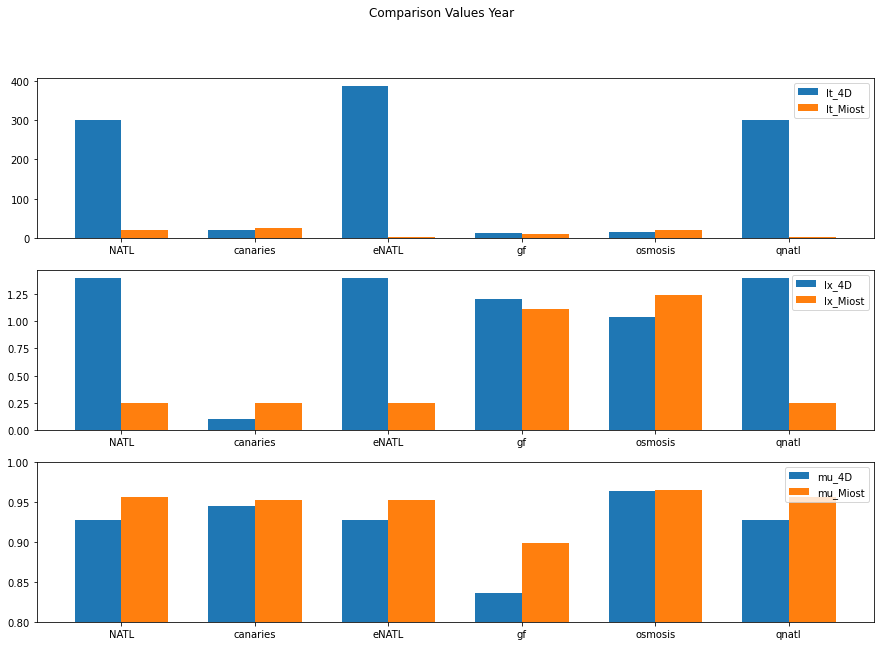

In [18]:
def plot_data(df,name):  
    
    fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15, 10))
    fig.suptitle('Comparison Values ' + str(name))
    
    bar_width = 0.35  # Ancho de las barras
    domain = np.arange(len(df['domain']))  # Rango de dominio
    
    # Barras para lt_x y lt_y
    ax1.bar(domain, df["lt_x"], width=bar_width, label='lt_4D')
    ax1.bar(domain + bar_width, df["lt_y"], width=bar_width, label='lt_Miost')
    ax1.set_xticks(domain + bar_width / 2)
    ax1.set_xticklabels(df['domain'])
    ax1.legend()
    
    # Barras para lx_x y lx_y
    ax2.bar(domain, df["lx_x"], width=bar_width, label='lx_4D')
    ax2.bar(domain + bar_width, df["lx_y"], width=bar_width, label='lx_Miost')
    ax2.set_xticks(domain + bar_width / 2)
    ax2.set_xticklabels(df['domain'])
    ax2.legend()
    
    # Barras para mu_x y mu_y
    ax3.bar(domain, df["mu_x"], width=bar_width, label='mu_4D')
    ax3.bar(domain + bar_width, df["mu_y"], width=bar_width, label='mu_Miost')
    ax3.set_xticks(domain + bar_width / 2)
    ax3.set_xticklabels(df['domain'])
    ax3.set_ylim([.8, 1])
    ax3.legend()
    
    plt.savefig(name)

for i in range(5):
    plot_data(dfs[i],Seasons[i])

### - By Domain

In [19]:
# sort_merged = merged.drop(merged[merged['period'] == 'Year'].index)
sort_merged = merged
sort_merged['period'] = pd.Categorical(sort_merged['period'], Seasons)
sort_merged = merged.sort_values('period')
sort_merged

,variable_x,domain,period,lt_x,lx_x,mu_x,variable_y,lt_y,lx_y,mu_y
27,4d,qnatl,January-February,9.848,0.711,0.94162,miost,3.551,0.250,0.95699
23,4d,osmosis,January-February,14.309,1.115,0.96429,miost,15.763,1.493,0.96584
4,4d,NATL,January-February,9.858,0.712,0.94162,miost,3.532,0.250,0.95625
6,4d,canaries,January-February,20.848,0.937,0.95178,miost,12.833,1.272,0.95691
16,4d,gf,January-February,13.302,1.361,0.86964,miost,11.701,1.158,0.90162
13,4d,eNATL,January-February,8.412,0.710,0.94162,miost,3.503,0.250,0.95069
0,4d,NATL,April-May,8.539,0.100,0.94237,miost,2.512,0.250,0.95662
24,4d,osmosis,April-May,11.583,1.002,0.96739,miost,8.180,1.112,0.96716
17,4d,gf,April-May,11.382,1.497,0.86859,miost,10.210,1.435,0.89097
11,4d,eNATL,April-May,8.539,0.100,0.94237,miost,2.523,0.250,0.95342


In [20]:
def plot_data2(df, name):
        
    fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3,2,figsize=(15, 10),gridspec_kw={'width_ratios': [3, 1]})
    fig.suptitle('Comparison Values ' + str(name))
    
    bar_width = 0.35  # Ancho de las barras
    periods = np.arange(len(df['period'])-1)  # Rango de dominio
    
    Meses = ['January-February', 'April-May', 'July-August', 'Octobre-Novembre']
    Year = 'Year'
    
    df_m = df.drop(df[df['period'] == 'Year'].index)
    df_y = df.loc[df['period'] == Year]
    
    # Barras para lt_x y lt_y
    ax1.bar(periods, df_m["lt_x"] , width=bar_width, label='lt_4D')
    ax1.bar(periods + bar_width, df_m['lt_y'] , width=bar_width, label='lt_Miost')
    ax1.set_xticks(periods + bar_width / 2)
    ax1.set_xticklabels(Meses)
    ax1.legend()
    
    # Barras para lx_x y lx_y
    ax3.bar(periods, df_m["lx_x"], width=bar_width, label='lx_4D')
    ax3.bar(periods + bar_width, df_m["lx_y"], width=bar_width, label='lx_Miost')
    ax3.set_xticks(periods + bar_width / 2)
    ax3.set_xticklabels(Meses)
    ax3.legend()
    
    # Barras para mu_x y mu_y
    ax5.bar(periods, df_m["mu_x"], width=bar_width, label='mu_4D')
    ax5.bar(periods + bar_width, df_m["mu_y"], width=bar_width, label='mu_Miost')
    ax5.set_xticks(periods + bar_width / 2)
    ax5.set_xticklabels(Meses)
    ax5.set_ylim([.8, 1])
    ax5.legend()
    
    # Barras para lt_x y lt_y
    ax2.bar(1, df_y["lt_x"], width=bar_width, label='lt_4D')
    ax2.bar(1 + bar_width, df_y["lt_y"], width=bar_width, label='lt_Miost')
    ax2.legend()
    
    # Barras para lx_x y lx_y
    ax4.bar(1, df_y["lx_x"], width=bar_width, label='lx_4D')
    ax4.bar(1 + bar_width, df_y["lx_y"], width=bar_width, label='lx_Miost')
    ax4.legend()
    
    # Barras para mu_x y mu_y
    ax6.bar(1, df_y["mu_x"], width=bar_width, label='mu_4D')
    ax6.bar(1 + bar_width, df_y["mu_y"], width=bar_width, label='mu_Miost')
    ax6.set_xlabel(Year)
    ax6.legend()
    
    plt.savefig(name)
    

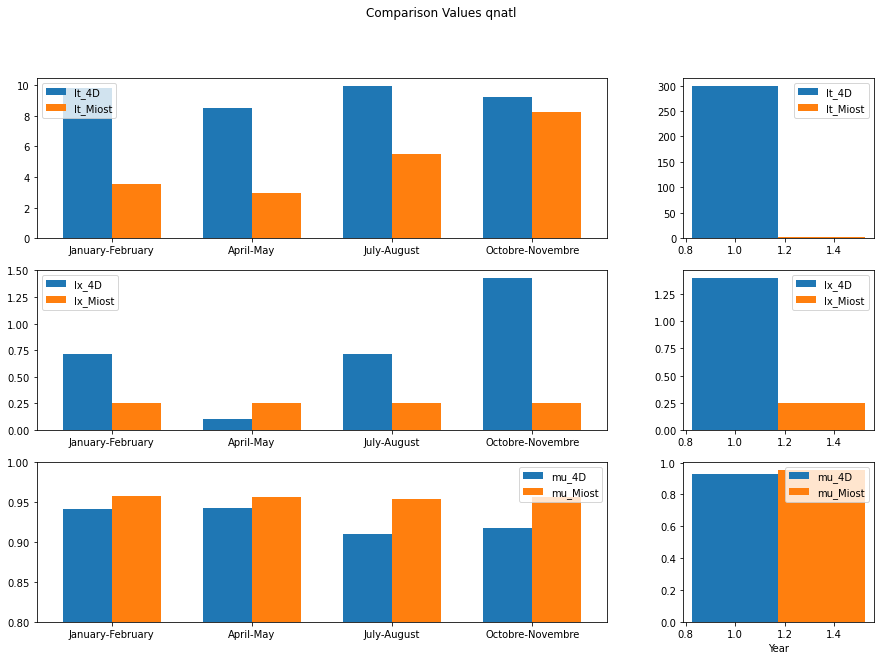

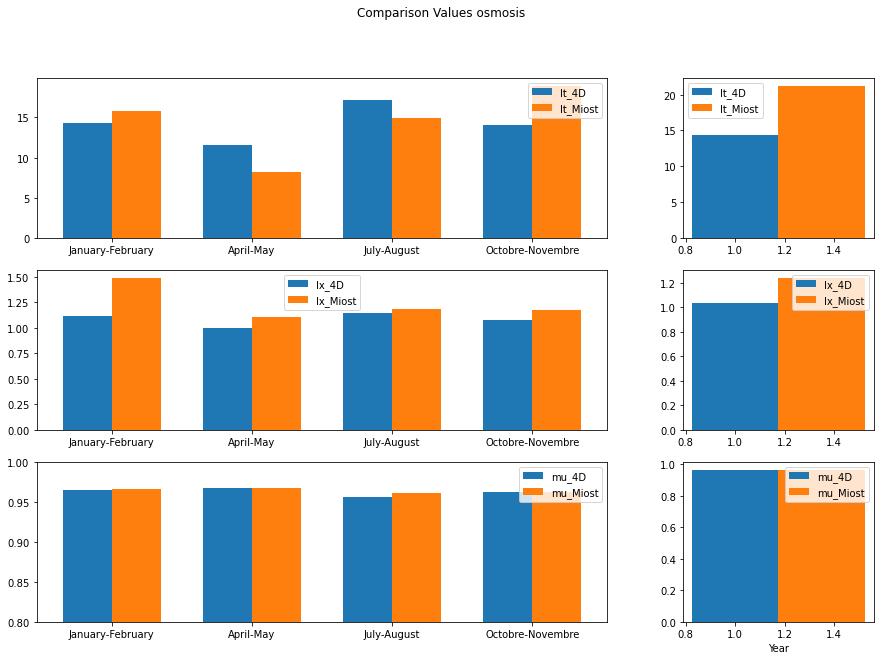

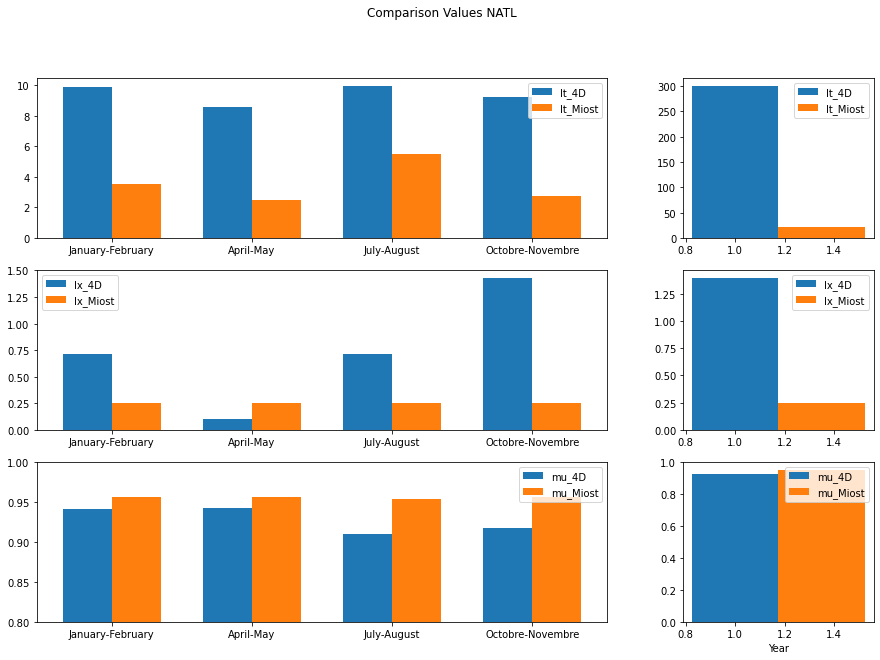

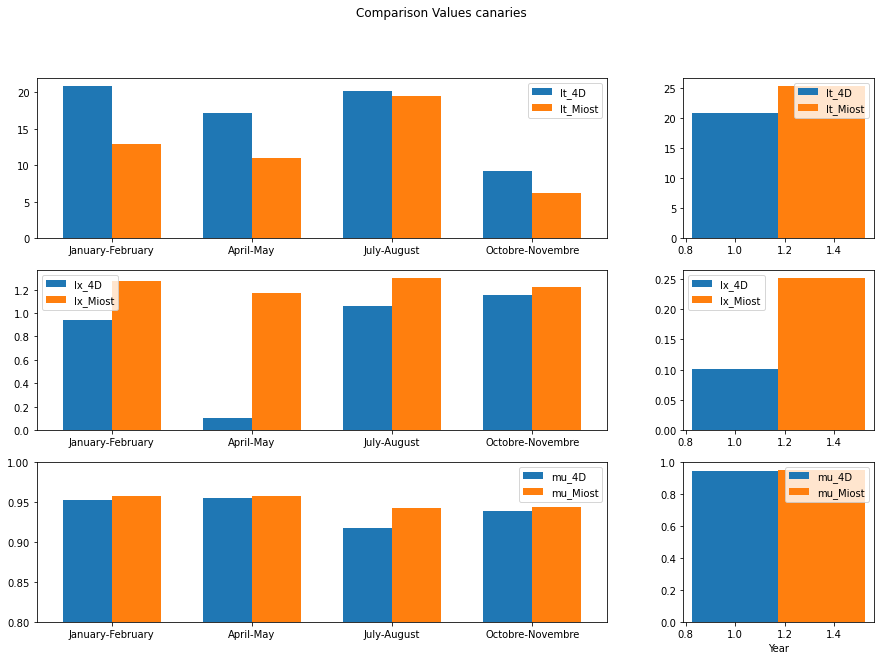

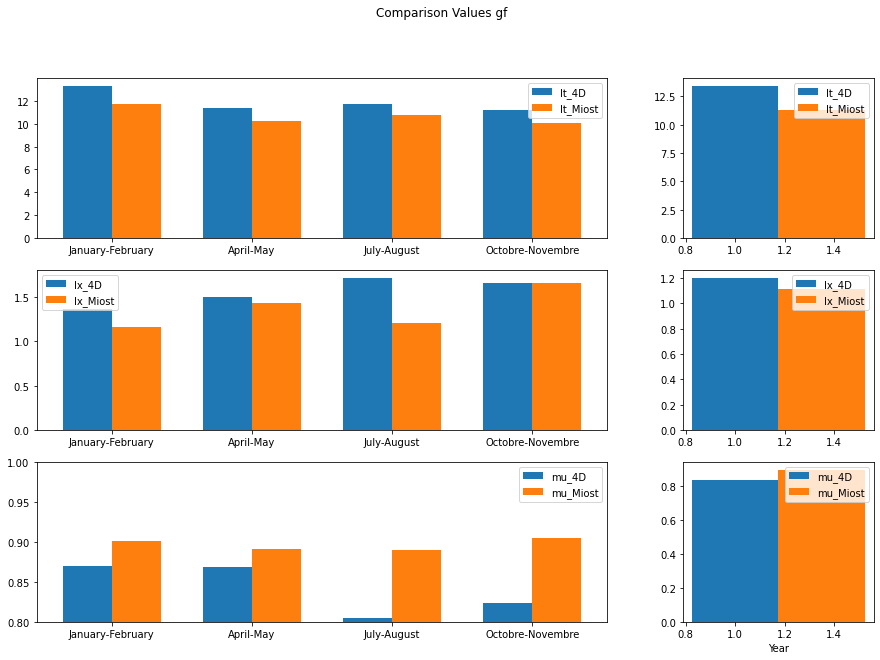

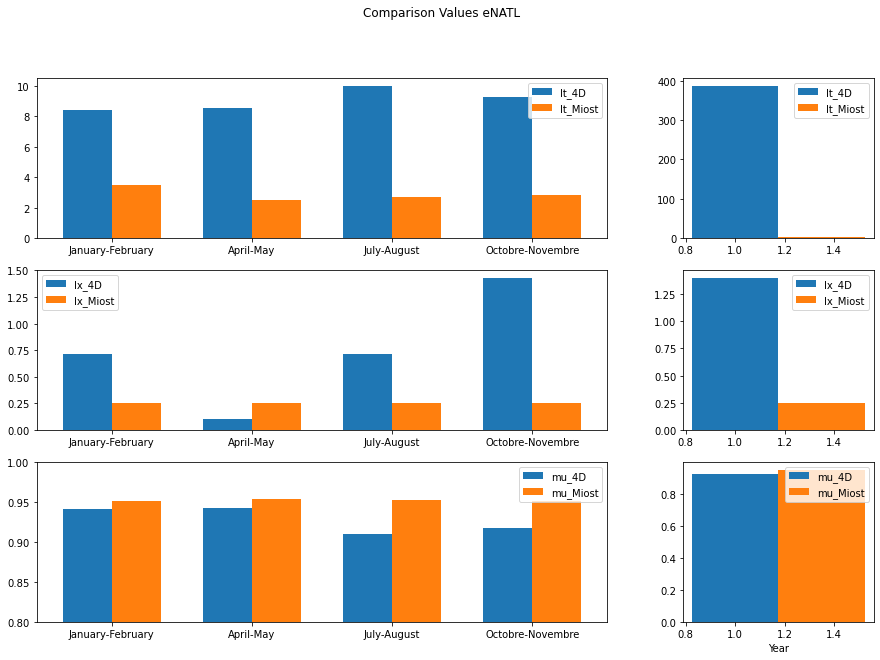

In [21]:
domains = sort_merged['domain'].unique()
for i in domains:
    plot_data2(sort_merged.loc[sort_merged['domain'] == i],i)

In [22]:
df_head = merged.sort_values(by='mu_y', ascending=False)
df_head.head()

,variable_x,domain,period,lt_x,lx_x,mu_x,variable_y,lt_y,lx_y,mu_y
24,4d,osmosis,April-May,11.583,1.002,0.96739,miost,8.180,1.112,0.96716
23,4d,osmosis,January-February,14.309,1.115,0.96429,miost,15.763,1.493,0.96584
22,4d,osmosis,Year,14.396,1.037,0.96333,miost,21.214,1.243,0.96494
21,4d,osmosis,Octobre-Novembre,14.066,1.080,0.96189,miost,18.904,1.180,0.96175
20,4d,osmosis,July-August,17.139,1.148,0.95638,miost,14.947,1.190,0.96149


In [23]:
df_head2 = merged.sort_values(by='mu_x', ascending=False)
df_head2.head()

,variable_x,domain,period,lt_x,lx_x,mu_x,variable_y,lt_y,lx_y,mu_y
24,4d,osmosis,April-May,11.583,1.002,0.96739,miost,8.180,1.112,0.96716
23,4d,osmosis,January-February,14.309,1.115,0.96429,miost,15.763,1.493,0.96584
22,4d,osmosis,Year,14.396,1.037,0.96333,miost,21.214,1.243,0.96494
21,4d,osmosis,Octobre-Novembre,14.066,1.080,0.96189,miost,18.904,1.180,0.96175
20,4d,osmosis,July-August,17.139,1.148,0.95638,miost,14.947,1.190,0.96149
